# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

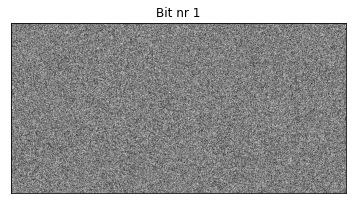

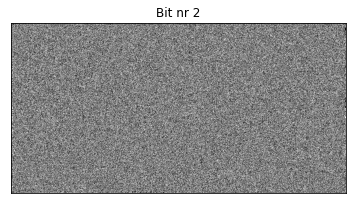

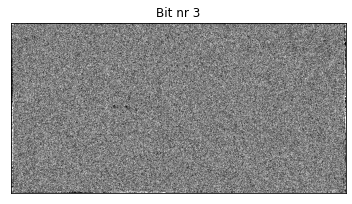

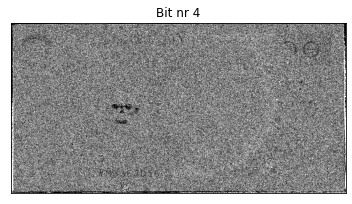

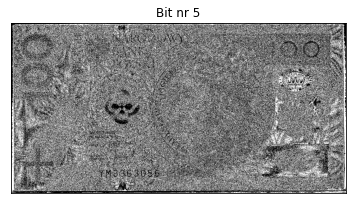

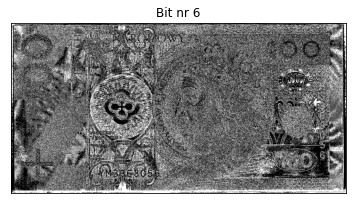

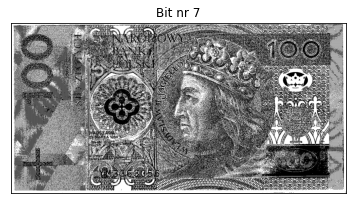

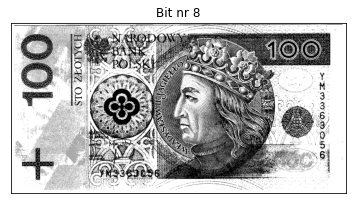

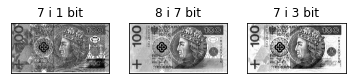

In [3]:
if not os.path.exists("100zloty.jpg") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg
zloty=cv2.imread("100zloty.jpg")
#Konwersje
zloty_kolor = cv2.cvtColor(zloty, cv2.COLOR_BGR2RGB)
zloty_100 = cv2.cvtColor(zloty_kolor, cv2.COLOR_RGB2GRAY)

bits=[]
x=1
for bit in [np.power(2,x) for x in range(8)]:
    zero=bit*np.ones((847,1661))
    zero_8=zero.astype('uint8')
    bit=cv2.bitwise_and(zloty_100,zero_8)
    bits.append(bit)
    plt.imshow(bit)
    plt.xticks([]), plt.yticks([])
    plt.title("Bit nr {}".format(x))
    x+=1
    plt.gray()
    plt.show()

rek_1 = cv2.add(bits[6],bits[1])
rek_2 = cv2.add(bits[7],bits[6])
rek_3 = cv2.add(bits[7],bits[2])
f, (ax1,ax2,ax3) = plt.subplots(1,3)
ax1.set_title('7 i 1 bit')
ax2.set_title('8 i 7 bit')
ax3.set_title('7 i 3 bit')
ax1.imshow(rek_1)
ax2.imshow(rek_2)
ax3.imshow(rek_3)
for ax in (ax1,ax2,ax3):
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()
